In [1]:
import seaborn as sns

from casual_inference.dataset import create_sample_biased
from casual_inference.evaluator import LinearRegressionEvaluator

In [2]:
data = create_sample_biased(sample_size=100000)
data.head()

,unit,covar_numer1,covar_numer2,covar_cat,treatment,target
0,0,0.355181,1.542694,1,1,14.606456
1,1,-1.527529,1.900206,3,1,0.416403
2,2,-1.889520,0.311220,3,1,9.071226
3,3,1.114792,1.876008,3,1,9.806085
4,4,0.346419,0.255590,2,0,12.524008


## Data Observation

<AxesSubplot: xlabel='target', ylabel='Probability'>

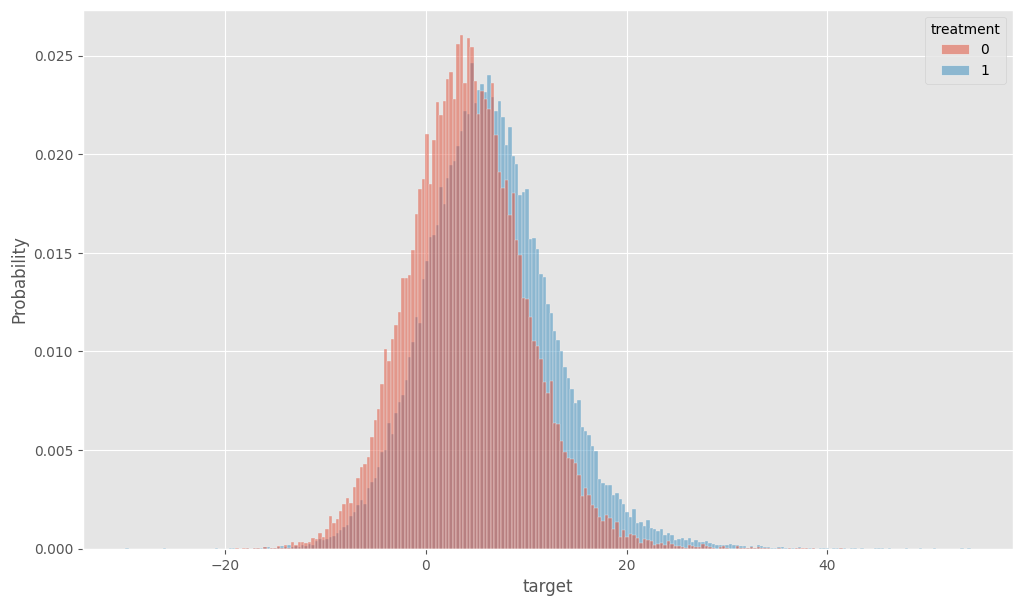

In [3]:
sns.histplot(data=data, x="target", hue="treatment", common_norm=False, stat="probability")

<AxesSubplot: xlabel='covar_numer1', ylabel='Probability'>

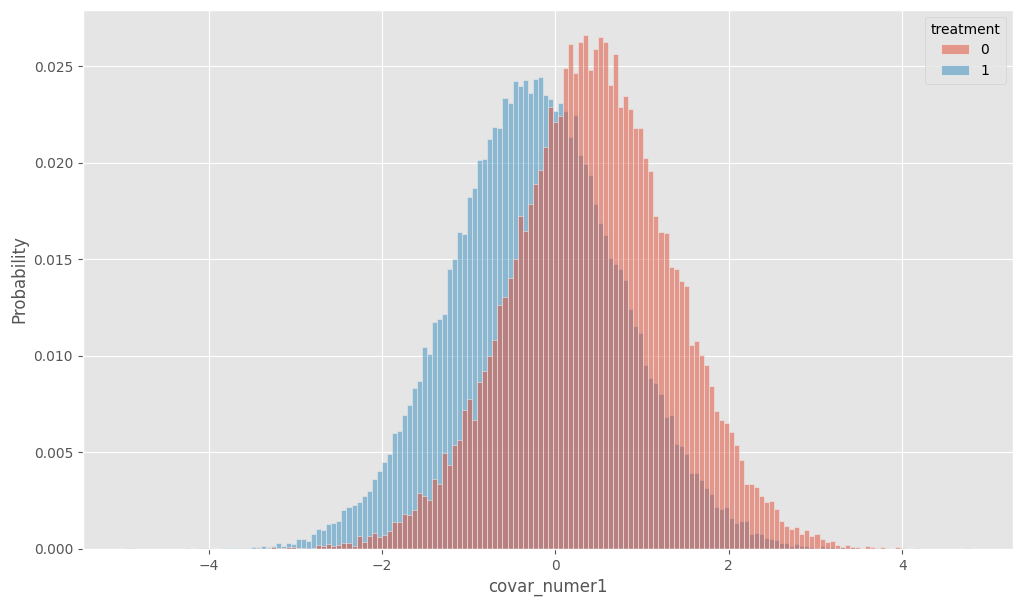

In [4]:
sns.histplot(data=data, x="covar_numer1", hue="treatment", common_norm=False, stat="probability")

<AxesSubplot: xlabel='covar_numer2', ylabel='Probability'>

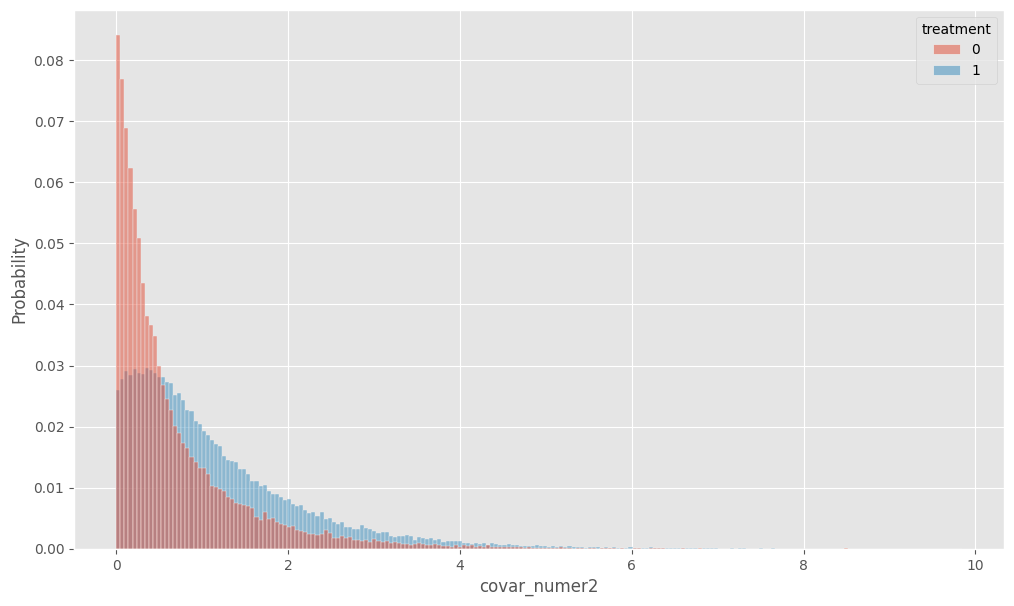

In [5]:
sns.histplot(data=data, x="covar_numer2", hue="treatment", common_norm=False, stat="probability")

## Analysis

### Unbiased

In [6]:
evaluator = LinearRegressionEvaluator().evaluate(data=data, unit_col="unit", metrics=["target"], treatment_col="treatment", covariates=["covar_numer1", "covar_numer2", "covar_cat"])

In [9]:
evaluator.summary_plot()

![eval_result](images/plot_linearregressionevaluator_result.png)

### Biased

In [10]:
evaluator_wo_covar = LinearRegressionEvaluator().evaluate(data=data, unit_col="unit", metrics=["target"], treatment_col="treatment")
evaluator_wo_covar.summary_plot()

![eval_result](images/plot_linearregressionevaluator_result_biased.png)